<a href="https://colab.research.google.com/github/JBlake26/ECGR4105_IntroToML/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#drive.mount('/content/drive/')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%matplotlib inline
from google.colab import drive
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

Homework 1

In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 80% and 20% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

Problem 1a

Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 



 

In [2]:
# Import data set & set data frame

csv = pd.read_csv("/content/drive/MyDrive/ECGR 4105 - Intro to Machine Learning/Homework/Housing.csv")

df = pd.DataFrame(csv)
print(df.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [3]:
# Binary categories

def useful_category(df):
    DFtemp = df
    col = df.columns.tolist()
    types = df.dtypes
    for i in range(len(col)):
        if types[i] == 'object' or types[i] == 'str':
            DFtemp[col[i]] = df[col[i]].astype('category').cat.codes
        else: 
            DFtemp[col[i]] = df[col[i]]
    return DFtemp
df = useful_category(df)
print(df.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [4]:
# Set Input & Outputs, split the variables, a ones vector to the inputs,
# set the thetas for training & validation, get the trainingEX from the OPs

P1col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
In = df[P1col]
Out = df.iloc[:,0]

trainingX, validationX, trainingY, validationY = train_test_split(In, Out, test_size = .2, random_state = 420)

trainingIn = pd.concat([pd.Series(1, index = trainingX.index, name = '00'), trainingX], axis=1)
validationIn = pd.concat([pd.Series(1,index = validationX.index, name = '00'), validationX], axis =1)

thetaTraining = np.array([0]*len(trainingIn.columns))
thetaValidation = np.array([0]*len(validationIn.columns))

trainingEX = len(trainingY)
validationEX = len(validationY)

In [5]:
# Loss Function

def compute_loss (In, Out, theta,trainingEX):
  predictions = In.dot(theta)
  errors = np.subtract(predictions, Out)
  sqrErrors = np.square(errors)
  J = 1 / (2 * trainingEX) * np.sum(sqrErrors)
  return J

# Gradient Descent Function

def gradient_descent(In, Out, theta,trainingEX, alpha, iterations):
  Loss_old = np.zeros(iterations)
  for i in range(iterations):
    predictions = In.dot(theta)
    errors = np.subtract(predictions, Out)
    sum_delta = (alpha/trainingEX) * In.transpose().dot(errors);
    theta = theta - sum_delta;
    Loss_old[i] = compute_loss(In,Out,theta,trainingEX)
  return theta, Loss_old

In [6]:
# Loss calculation for training set

LossTraining = compute_loss(trainingIn,trainingY,thetaTraining,trainingEX)
print(LossTraining)

# Loss calculation for validation set

LossValidation = compute_loss(validationIn,validationY,thetaValidation,validationEX)
print(LossValidation)

13090392247968.578
13173012831422.02


In [7]:
# Gradient descent for training

thetaTraining = [0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.000000001;

thetaTraining, LossTraining = gradient_descent(trainingIn,trainingY,thetaTraining,trainingEX,alpha, iterations)
print('Final value of theta =', thetaTraining)

# Gradient descent for validation

thetaValidation = [0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.000000001;

thetaValidation, LossValidation = gradient_descent(validationIn,validationY,thetaValidation,validationEX, alpha, iterations)
print('Final value of theta =', thetaValidation)

Final value of theta = 00             0.321050
area         853.093864
bedrooms       1.107512
bathrooms      0.552080
stories        0.865308
parking        0.247941
dtype: float64
Final value of theta = 00             0.319582
area         866.478174
bedrooms       1.102199
bathrooms      0.644887
stories        0.823509
parking        0.347203
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

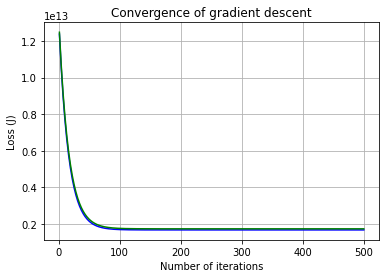

In [8]:
# Loss graph

plt.plot(range(1,iterations + 1), LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

1.b) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 

In [9]:
# Set Input & Outputs, split the variables, a ones vector to the inputs,
# set the thetas for training & validation, get the trainingEX from the OPs

P2col = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

In = df[P2col]
Out = df.iloc[:,0]

xTraining, xValidation, trainingY, validationY = train_test_split(In, Out, test_size = .2, random_state = 420)

trainingIn = pd.concat([pd.Series(1, index=xTraining.index, name='00'), xTraining], axis=1)
validationIn = pd.concat([pd.Series(1,index=xValidation.index, name='00'), xValidation], axis =1)

thetaTraining = np.array([0]*len(trainingIn.columns))
thetaValidation = np.array([0]*len(validationIn.columns))

trainingEX = len(trainingY)
validationEX = len(validationY)

In [10]:
# Loss calculation for training set

LossTraining = compute_loss(trainingIn,trainingY,thetaTraining,trainingEX)
print(LossTraining)

# Loss calculation for validation set

LossValidation = compute_loss(validationIn,validationY,thetaValidation,validationEX)
print(LossValidation)

13090392247968.578
13173012831422.02


In [11]:
# Gradient descent for training

thetaTraining = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.000000001;

thetaTraining, LossTraining = gradient_descent(trainingIn,trainingY,thetaTraining,trainingEX,alpha, iterations)
print('Final value of theta =', thetaTraining)

# Gradient descent for validation

thetaValidation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.000000001;

thetaValidation, LossValidation = gradient_descent(validationIn,validationY,thetaValidation,validationEX, alpha, iterations)
print('Final value of theta =', thetaValidation)

Final value of theta = 00                   0.321050
area               853.093791
bedrooms             1.107512
bathrooms            0.552080
stories              0.865308
mainroad             0.289297
guestroom            0.101810
basement             0.183078
hotwaterheating      0.034783
airconditioning      0.225673
parking              0.247941
prefarea             0.129487
dtype: float64
Final value of theta = 00                   0.319582
area               866.478111
bedrooms             1.102199
bathrooms            0.644887
stories              0.823509
mainroad             0.266418
guestroom            0.101204
basement             0.146365
hotwaterheating      0.034262
airconditioning      0.139793
parking              0.347203
prefarea             0.077772
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

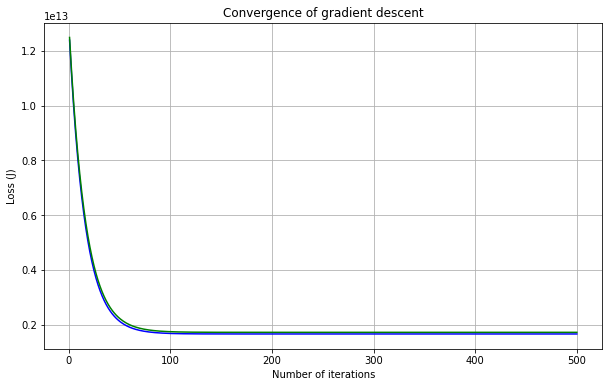

In [12]:
# Loss graph

plt.plot(range(1,iterations + 1), LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Problem 2 (30 points)

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

In [13]:
# Import data set, set data frame for normalized & standardized sets

csv = pd.read_csv("/content/drive/MyDrive/ECGR 4105 - Intro to Machine Learning/Homework/Housing.csv")

df = pd.DataFrame(csv)
print(df.head)

NORM_DF = csv
print(NORM_DF.head)

STANDARD_DF = csv
print(STANDARD_DF.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [14]:
# Normalized set WIP

NORM_DF = useful_category(NORM_DF)
print(NORM_DF.head)

# Standardized set WIP

STANDARD_DF = useful_category(STANDARD_DF)
print(STANDARD_DF.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [15]:
# Standardize set

S_Columns = STANDARD_DF.columns
scaler = preprocessing.StandardScaler().fit(STANDARD_DF)
STANDARD_DF[S_Columns] = scaler.transform(STANDARD_DF[S_Columns])

In [16]:
# Normalize set

N_Columns = NORM_DF.columns
normalizer = preprocessing.Normalizer().fit(NORM_DF)
NORM_DF[N_Columns] = normalizer.transform(NORM_DF[N_Columns])

In [17]:
P1col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Standardized

StandardIn = STANDARD_DF[P1col]
StandardOut = STANDARD_DF.iloc[:,0]

# Normalized

NormIn = NORM_DF[P1col]
NormOut = NORM_DF.iloc[:,0]


# Split sets

X_standardTraining, X_standardValidation, Y_StandardTraining, Y_StandardValidation = train_test_split(StandardIn, StandardOut, test_size = .2, random_state = 420)
X_NormTraining, X_NormValidation, Y_NormTraining, Y_NormValidation = train_test_split(NormIn,NormOut, test_size = .2, random_state = 420)


# Add ones vector to inputs

# Normalized

normTrainingIn = pd.concat([pd.Series(1, index=X_NormTraining.index, name='00'), X_NormTraining], axis=1)
normValidationIn = pd.concat([pd.Series(1,index=X_NormValidation.index, name='00'), X_NormValidation], axis =1)

# Standardized

standardTrainingIn = pd.concat([pd.Series(1, index=X_standardTraining.index, name='00'), X_NormTraining], axis=1)
standardValidationIn = pd.concat([pd.Series(1,index=X_standardValidation.index, name='00'), X_NormValidation], axis =1)

# Set thetas

# Normalized

norm_thetaTraining = np.array([0]*len(normTrainingIn.columns))
norm_thetaValidation = np.array([0]*len(normValidationIn.columns))

# Standardized

standard_thetaTraining = np.array([0]*len(standardTrainingIn.columns))
standard_thetaValidation = np.array([0]*len(standardValidationIn.columns))

# Getting the trainingEX values from outputs

# Normalized

normTraining_examples = len(Y_NormTraining)
normValidationEX = len(Y_NormValidation)

# Standardized

standardTraining_examples = len(Y_StandardTraining)
standardValidationEX = len(Y_StandardValidation)

In [18]:
# Loss calculation for both sets

# Normalized

Norm_LossTraining = compute_loss(normTrainingIn,Y_NormTraining,norm_thetaTraining,normTraining_examples)
print(Norm_LossTraining)

Norm_LossValidation = compute_loss(normValidationIn,Y_NormValidation,norm_thetaValidation,normValidationEX)
print(Norm_LossValidation)

# Standardized

Standard_LossTraining = compute_loss(standardTrainingIn,Y_StandardTraining,standard_thetaTraining,standardTraining_examples)
print(Standard_LossTraining)

Standard_LossValidation = compute_loss(standardValidationIn,Y_StandardValidation,standard_thetaValidation,standardValidationEX)
print(Standard_LossValidation)

0.034184007188717
0.03285794079291208
0.034184007188717
0.03285794079291208


In [19]:
# Gradient descent

# Training

# Normalized

norm_thetaTraining = [0.,0.,0.,0.,0.,0.]
iterations = 700;
alpha = 0.1;

Norm_thetaTraining, Norm_LossTraining = gradient_descent(normTrainingIn,Y_NormTraining,norm_thetaTraining,normTraining_examples,alpha, iterations)
print('Final value of theta =', Norm_thetaTraining)


# Standardized

standard_thetaTraining = [0.,0.,0.,0.,0.,0.]
iterations = 700;
alpha = 0.1;
Standard_thetaTraining, Standard_LossTraining = gradient_descent(standardTrainingIn,Y_StandardTraining,standard_thetaTraining,standardTraining_examples,alpha, iterations)
print('Final value of theta =', Standard_thetaTraining)

# Validation

# Normalized

norm_thetaValidation = [0.,0.,0.,0.,0.,0.]
iterations = 700;
alpha = 0.1;
norm_thetaValidation, Norm_LossValidation = gradient_descent(normValidationIn,Y_NormValidation,norm_thetaValidation,normValidationEX, alpha, iterations)
print('Final value of theta =', norm_thetaValidation)

# Stanardized

standard_thetaValidation = [0.,0.,0.,0.,0.,0.]
iterations = 700;
alpha = 0.1;
standard_thetaValidation, Standard_LossValidation = gradient_descent(standardValidationIn,Y_StandardValidation,standard_thetaValidation,standardValidationEX, alpha, iterations)
print('Final value of theta =', standard_thetaValidation)

Final value of theta = 00          -0.009416
area         0.365514
bedrooms     0.069953
bathrooms    0.293183
stories      0.238279
parking      0.135442
dtype: float64
Final value of theta = 00          -0.009416
area         0.365514
bedrooms     0.069953
bathrooms    0.293183
stories      0.238279
parking      0.135442
dtype: float64
Final value of theta = 00          -0.006033
area         0.400404
bedrooms     0.042953
bathrooms    0.272086
stories      0.256782
parking      0.148608
dtype: float64
Final value of theta = 00          -0.006033
area         0.400404
bedrooms     0.042953
bathrooms    0.272086
stories      0.256782
parking      0.148608
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

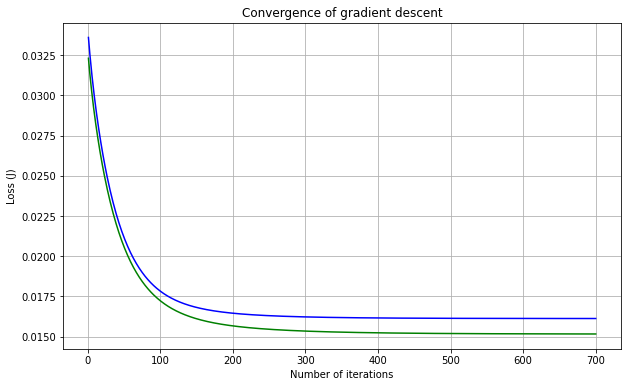

In [20]:
# Loss graph

plt.plot(range(1,iterations + 1), Norm_LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), Norm_LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

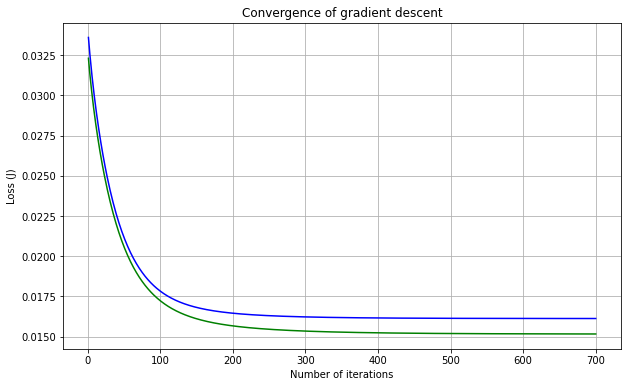

In [21]:
plt.plot(range(1,iterations + 1), Standard_LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), Standard_LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

In [22]:
P2col = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

# Standardized

StandardIn = STANDARD_DF[P2col]
StandardOut = STANDARD_DF.iloc[:,0]

# Normalized

NormIn = NORM_DF[P2col]
NormOut = NORM_DF.iloc[:,0]

# Split the sets

X_standardTraining, X_standardValidation, Y_StandardTraining, Y_StandardValidation = train_test_split(StandardIn, StandardOut, test_size = .2, random_state = 420)
X_NormTraining, X_NormValidation, Y_NormTraining, Y_NormValidation = train_test_split(NormIn,NormOut, test_size = .2, random_state = 420)

# Add ones vector to inputs

#Normalized

normTrainingIn = pd.concat([pd.Series(1, index=X_NormTraining.index, name='00'), X_NormTraining], axis=1)
normValidationIn = pd.concat([pd.Series(1,index=X_NormValidation.index, name='00'), X_NormValidation], axis =1)

#Standardized

standardTrainingIn = pd.concat([pd.Series(1, index=X_standardTraining.index, name='00'), X_NormTraining], axis=1)
standardValidationIn = pd.concat([pd.Series(1,index=X_standardValidation.index, name='00'), X_NormValidation], axis =1)

# Set thetas

# Normalized

norm_thetaTraining = np.array([0]*len(normTrainingIn.columns))
norm_thetaValidation = np.array([0]*len(normValidationIn.columns))

# Standardized
standard_thetaTraining = np.array([0]*len(standardTrainingIn.columns))
standard_thetaValidation = np.array([0]*len(standardValidationIn.columns))

# Getting the trainingEX values

# Normalized
normTraining_examples = len(Y_NormTraining)
normValidationEX = len(Y_NormValidation)

# Standardized
standardTraining_examples = len(Y_StandardTraining)
standardValidationEX = len(Y_StandardValidation)

In [23]:
# Loss calculation for both sets

# Normalized

Norm_LossTraining = compute_loss(normTrainingIn,Y_NormTraining,norm_thetaTraining,normTraining_examples)
print(Norm_LossTraining)
Norm_LossValidation = compute_loss(normValidationIn,Y_NormValidation,norm_thetaValidation,normValidationEX)
print(Norm_LossValidation)

# Standardized

Standard_LossTraining = compute_loss(standardTrainingIn,Y_StandardTraining,standard_thetaTraining,standardTraining_examples)
print(Standard_LossTraining)
Standard_LossValidation = compute_loss(standardValidationIn,Y_StandardValidation,standard_thetaValidation,standardValidationEX)
print(Standard_LossValidation)

0.034184007188717
0.03285794079291208
0.034184007188717
0.03285794079291208


In [24]:
# Gradient descent

# Training

# Normalized

norm_thetaTraining = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.1;
Norm_thetaTraining, Norm_LossTraining = gradient_descent(normTrainingIn,Y_NormTraining,norm_thetaTraining,normTraining_examples,alpha, iterations)
print('Final value of theta =', Norm_thetaTraining)

# Standardized

standard_thetaTraining = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.1;
Standard_thetaTraining, Standard_LossTraining = gradient_descent(standardTrainingIn,Y_StandardTraining,standard_thetaTraining,standardTraining_examples,alpha, iterations)
print('Final value of theta =', Standard_thetaTraining)

# Validation

# Normalized

norm_thetaValidation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.1;
norm_thetaValidation, Norm_LossValidation = gradient_descent(normValidationIn,Y_NormValidation,norm_thetaValidation,normValidationEX, alpha, iterations)
print('Final value of theta =', norm_thetaValidation)

# Stanardized

standard_thetaValidation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.1;
standard_thetaValidation, Standard_LossValidation = gradient_descent(standardValidationIn,Y_StandardValidation,standard_thetaValidation,standardValidationEX, alpha, iterations)
print('Final value of theta =', standard_thetaValidation)

Final value of theta = 00                -0.003906
area               0.279311
bedrooms           0.060752
bathrooms          0.231078
stories            0.185913
mainroad           0.076013
guestroom          0.083000
basement           0.073980
hotwaterheating    0.083278
airconditioning    0.203625
parking            0.105997
prefarea           0.142958
dtype: float64
Final value of theta = 00                -0.003906
area               0.279311
bedrooms           0.060752
bathrooms          0.231078
stories            0.185913
mainroad           0.076013
guestroom          0.083000
basement           0.073980
hotwaterheating    0.083278
airconditioning    0.203625
parking            0.105997
prefarea           0.142958
dtype: float64
Final value of theta = 00                -0.000232
area               0.224156
bedrooms           0.052958
bathrooms          0.236169
stories            0.237286
mainroad           0.121069
guestroom          0.065420
basement           0.061778
hotwa

Text(0.5, 1.0, 'Convergence of gradient descent')

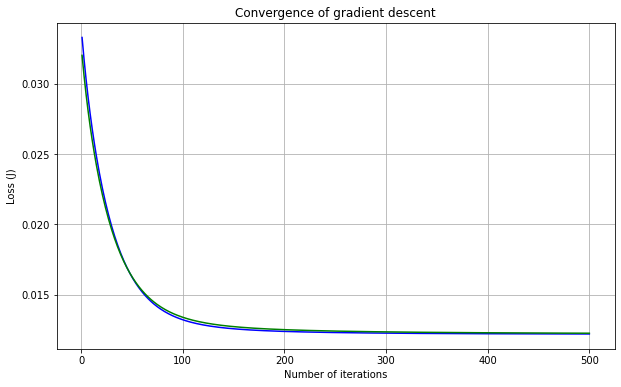

In [25]:
# Loss graph

plt.plot(range(1,iterations + 1), Norm_LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), Norm_LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

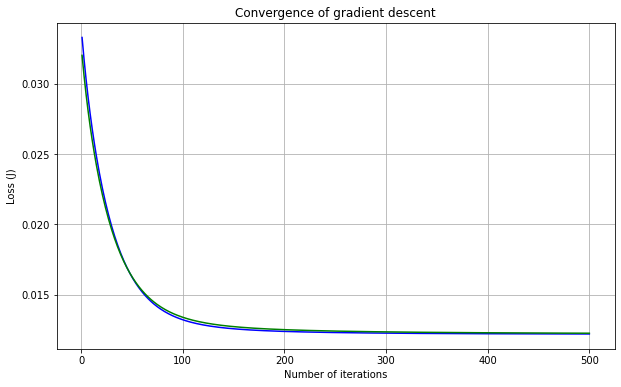

In [26]:
plt.plot(range(1,iterations + 1), Standard_LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), Standard_LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

**Problem 3 (40 points)**

3.a) Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a. 



In [27]:
# Import data set, set data frame for normalized & standardized sets

csv = pd.read_csv("/content/drive/MyDrive/ECGR 4105 - Intro to Machine Learning/Homework/Housing.csv")

df = pd.DataFrame(csv)
print(df.head)

NORM_DF = csv
print(NORM_DF.head)

STANDARD_DF = csv
print(STANDARD_DF.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [28]:
# Normalized Set WIP

NORM_DF = useful_category(NORM_DF)
print(NORM_DF.head)

# Standardized Set WIP

STANDARD_DF = useful_category(STANDARD_DF)
print(STANDARD_DF.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [29]:
# Standardize Set

S_Columns = STANDARD_DF.columns
scaler = preprocessing.StandardScaler().fit(STANDARD_DF)
STANDARD_DF[S_Columns] = scaler.transform(STANDARD_DF[S_Columns])

In [30]:
# Normalize Set

N_Columns = NORM_DF.columns
normalizer = preprocessing.Normalizer().fit(NORM_DF)
NORM_DF[N_Columns] = normalizer.transform(NORM_DF[N_Columns])

In [31]:
# Taking regularlization into account

lamb = 0.01
def gradient_descent(In, Out, theta,Training_Examples, alpha, iterations):
  Loss_old = np.zeros(iterations)

  for i in range(iterations):
    predictions = In.dot(theta)
    errors = np.subtract(predictions, Out)
    sum_delta = (alpha/Training_Examples) * In.transpose().dot(errors);
    if i > 0:
      sum_delta += ((alpha*lamb)/Training_Examples) * theta
    theta = theta - sum_delta;
    Loss_old[i] = compute_loss(In,Out,theta,Training_Examples)
  return theta, Loss_old

In [32]:
P1col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Standardized

StandardIn = STANDARD_DF[P1col]
StandardOut = STANDARD_DF.iloc[:,0]

# Normalized

NormIn = NORM_DF[P1col]
NormOut = NORM_DF.iloc[:,0]

# Split sets

X_standardTraining, X_standardValidation, Y_StandardTraining, Y_StandardValidation = train_test_split(StandardIn, StandardOut, test_size = .2, random_state = 420)
X_NormTraining, X_NormValidation, Y_NormTraining, Y_NormValidation = train_test_split(NormIn,NormOut, test_size = .2, random_state = 420)

# Add ones vector to inputs

# Normalized

normTrainingIn = pd.concat([pd.Series(1, index=X_NormTraining.index, name='00'), X_NormTraining], axis=1)
normValidationIn = pd.concat([pd.Series(1,index=X_NormValidation.index, name='00'), X_NormValidation], axis =1)

# Standardized

standardTrainingIn = pd.concat([pd.Series(1, index=X_standardTraining.index, name='00'), X_NormTraining], axis=1)
standardValidationIn = pd.concat([pd.Series(1,index=X_standardValidation.index, name='00'), X_NormValidation], axis =1)

# Set thetas

# Normalized

norm_thetaTraining = np.array([0]*len(normTrainingIn.columns))
norm_thetaValidation = np.array([0]*len(normValidationIn.columns))

# Standardized

standard_thetaTraining = np.array([0]*len(standardTrainingIn.columns))
standard_thetaValidation = np.array([0]*len(standardValidationIn.columns))

# TrainingEX values

# Normalized

normTraining_examples = len(Y_NormTraining)
normValidationEX = len(Y_NormValidation)

# Standardized

standardTraining_examples = len(Y_StandardTraining)
standardValidationEX = len(Y_StandardValidation)

In [33]:
# Loss calculation

# Normalized

Norm_LossTraining = compute_loss(normTrainingIn,Y_NormTraining,norm_thetaTraining,normTraining_examples)
print(Norm_LossTraining)
Norm_LossValidation = compute_loss(normValidationIn,Y_NormValidation,norm_thetaValidation,normValidationEX)
print(Norm_LossValidation)

# Standardized

Standard_LossTraining = compute_loss(standardTrainingIn,Y_StandardTraining,standard_thetaTraining,standardTraining_examples)
print(Standard_LossTraining)
Standard_LossValidation = compute_loss(standardValidationIn,Y_StandardValidation,standard_thetaValidation,standardValidationEX)
print(Standard_LossValidation)

0.034184007188717
0.03285794079291208
0.034184007188717
0.03285794079291208


In [34]:
# Gradient descent

# Training

# Normalized

norm_thetaTraining = [0.,0.,0.,0.,0.,0.]
iterations = 700;
alpha = 0.07;
Norm_thetaTraining, Norm_LossTraining = gradient_descent(normTrainingIn,Y_NormTraining,norm_thetaTraining,normTraining_examples,alpha, iterations)
print('Final value of theta =', Norm_thetaTraining)

# Standardized

standard_thetaTraining = [0.,0.,0.,0.,0.,0.]
iterations = 700;
alpha = 0.07;
Standard_thetaTraining, Standard_LossTraining = gradient_descent(standardTrainingIn,Y_StandardTraining,standard_thetaTraining,standardTraining_examples,alpha, iterations)
print('Final value of theta =', Standard_thetaTraining)

# Validation

# Normalized

norm_thetaValidation = [0.,0.,0.,0.,0.,0.]
iterations = 700;
alpha = 0.07;
norm_thetaValidation, Norm_LossValidation = gradient_descent(normValidationIn,Y_NormValidation,norm_thetaValidation,normValidationEX, alpha, iterations)
print('Final value of theta =', norm_thetaValidation)

# Stanardized

standard_thetaValidation = [0.,0.,0.,0.,0.,0.]
iterations = 700;
alpha = 0.07;
standard_thetaValidation, Standard_LossValidation = gradient_descent(standardValidationIn,Y_StandardValidation,standard_thetaValidation,standardValidationEX, alpha, iterations)
print('Final value of theta =', standard_thetaValidation)

Final value of theta = 00          -0.009596
area         0.357309
bedrooms     0.079907
bathrooms    0.287872
stories      0.232515
parking      0.140107
dtype: float64
Final value of theta = 00          -0.009596
area         0.357309
bedrooms     0.079907
bathrooms    0.287872
stories      0.232515
parking      0.140107
dtype: float64
Final value of theta = 00          -0.006669
area         0.389225
bedrooms     0.057078
bathrooms    0.271209
stories      0.239498
parking      0.150698
dtype: float64
Final value of theta = 00          -0.006669
area         0.389225
bedrooms     0.057078
bathrooms    0.271209
stories      0.239498
parking      0.150698
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

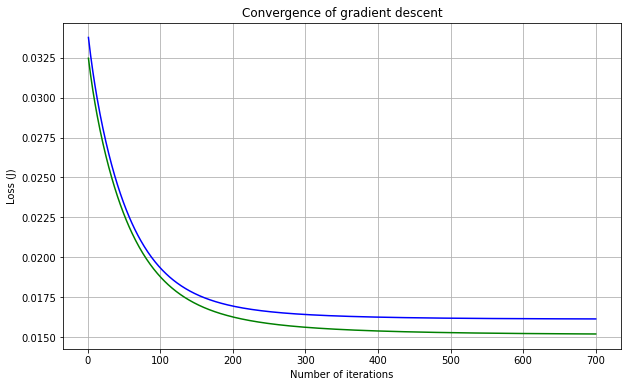

In [35]:
# Normalization Loss Graph

plt.plot(range(1,iterations + 1), Norm_LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), Norm_LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

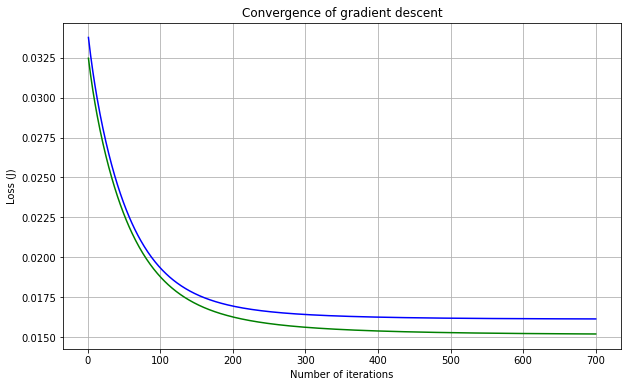

In [36]:
# Standardization Loss Graph

plt.plot(range(1,iterations + 1), Standard_LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), Standard_LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

3.b) Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b. 

In [37]:
P2col = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

# Standardized

StandardIn = STANDARD_DF[P2col]
StandardOut = STANDARD_DF.iloc[:,0]

# Normalized

NormIn = NORM_DF[P2col]
NormOut = NORM_DF.iloc[:,0]


# Split sets

X_standardTraining, X_standardValidation, Y_StandardTraining, Y_StandardValidation = train_test_split(StandardIn, StandardOut, test_size = .2, random_state = 420)
X_NormTraining, X_NormValidation, Y_NormTraining, Y_NormValidation = train_test_split(NormIn,NormOut, test_size = .2, random_state = 420)


# Add ones vector

# Normalized

normTrainingIn = pd.concat([pd.Series(1, index=X_NormTraining.index, name='00'), X_NormTraining], axis=1)
normValidationIn = pd.concat([pd.Series(1,index=X_NormValidation.index, name='00'), X_NormValidation], axis =1)

# Standardized

standardTrainingIn = pd.concat([pd.Series(1, index=X_standardTraining.index, name='00'), X_NormTraining], axis=1)
standardValidationIn = pd.concat([pd.Series(1,index=X_standardValidation.index, name='00'), X_NormValidation], axis =1)

# Set thetas

# Normalized

norm_thetaTraining = np.array([0]*len(normTrainingIn.columns))
norm_thetaValidation = np.array([0]*len(normValidationIn.columns))

# Standardized

standard_thetaTraining = np.array([0]*len(standardTrainingIn.columns))
standard_thetaValidation = np.array([0]*len(standardValidationIn.columns))

# TrainingEX values

# Normalized

normTraining_examples = len(Y_NormTraining)
normValidationEX = len(Y_NormValidation)

# Standardized

standardTraining_examples = len(Y_StandardTraining)
standardValidationEX = len(Y_StandardValidation)

In [38]:
# Loss calculation

# Normalized

Norm_LossTraining = compute_loss(normTrainingIn,Y_NormTraining,norm_thetaTraining,normTraining_examples)
print(Norm_LossTraining)
Norm_LossValidation = compute_loss(normValidationIn,Y_NormValidation,norm_thetaValidation,normValidationEX)
print(Norm_LossValidation)

# Standardized

Standard_LossTraining = compute_loss(standardTrainingIn,Y_StandardTraining,standard_thetaTraining,standardTraining_examples)
print(Standard_LossTraining)
Standard_LossValidation = compute_loss(standardValidationIn,Y_StandardValidation,standard_thetaValidation,standardValidationEX)
print(Standard_LossValidation)

0.034184007188717
0.03285794079291208
0.034184007188717
0.03285794079291208


In [39]:
# Gradient descent

# Training

# Normalized

norm_thetaTraining = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.1;
Norm_thetaTraining, Norm_LossTraining = gradient_descent(normTrainingIn,Y_NormTraining,norm_thetaTraining,normTraining_examples,alpha, iterations)
print('Final value of theta =', Norm_thetaTraining)

# Standardized

standard_thetaTraining = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.1;
Standard_thetaTraining, Standard_LossTraining = gradient_descent(standardTrainingIn,Y_StandardTraining,standard_thetaTraining,standardTraining_examples,alpha, iterations)
print('Final value of theta =', Standard_thetaTraining)

# Validation

# Normalized

norm_thetaValidation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.1;
norm_thetaValidation, Norm_LossValidation = gradient_descent(normValidationIn,Y_NormValidation,norm_thetaValidation,normValidationEX, alpha, iterations)
print('Final value of theta =', norm_thetaValidation)

# Stanardized

standard_thetaValidation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 500;
alpha = 0.1;
standard_thetaValidation, Standard_LossValidation = gradient_descent(standardValidationIn,Y_StandardValidation,standard_thetaValidation,standardValidationEX, alpha, iterations)
print('Final value of theta =', standard_thetaValidation)

Final value of theta = 00                -0.003910
area               0.279250
bedrooms           0.060770
bathrooms          0.231033
stories            0.185879
mainroad           0.076005
guestroom          0.083001
basement           0.073973
hotwaterheating    0.083249
airconditioning    0.203602
parking            0.105996
prefarea           0.142936
dtype: float64
Final value of theta = 00                -0.003910
area               0.279250
bedrooms           0.060770
bathrooms          0.231033
stories            0.185879
mainroad           0.076005
guestroom          0.083001
basement           0.073973
hotwaterheating    0.083249
airconditioning    0.203602
parking            0.105996
prefarea           0.142936
dtype: float64
Final value of theta = 00                -0.000257
area               0.223997
bedrooms           0.053052
bathrooms          0.236000
stories            0.237011
mainroad           0.120968
guestroom          0.065434
basement           0.061740
hotwa

Text(0.5, 1.0, 'Convergence of gradient descent')

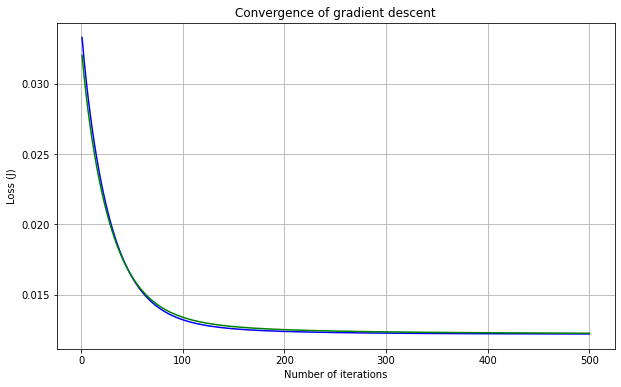

In [40]:
# Loss graph

plt.plot(range(1,iterations + 1), Norm_LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), Norm_LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

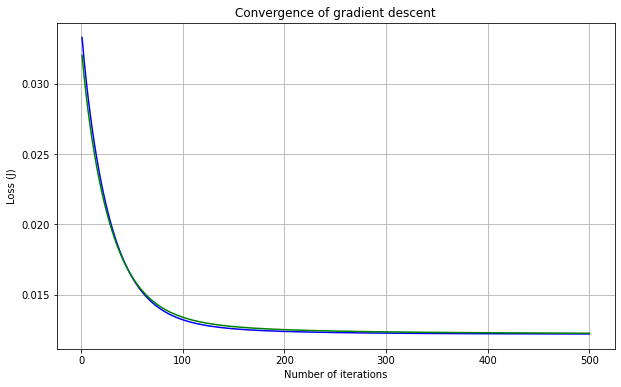

In [41]:
plt.plot(range(1,iterations + 1), Standard_LossTraining, color = 'blue')
plt.plot(range(1,iterations + 1), Standard_LossValidation, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')